# CNN

## Data

In [1]:
import os

for dirpath,dirnames,filenames in os.walk('data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in data
There are 2 directories and 0 images in data\test
There are 0 directories and 250 images in data\test\pizza
There are 0 directories and 250 images in data\test\steak
There are 2 directories and 0 images in data\train
There are 0 directories and 750 images in data\train\pizza
There are 0 directories and 750 images in data\train\steak


In [2]:
import pathlib
import numpy as np
data_dir = pathlib.Path('data/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_image(target_dir,target_class):
    target_folder = target_dir + "/" + target_class
    random_image = random.sample(os.listdir(target_folder),2)
    img = mpimg.imread(target_folder + '/' + random_image[0] )
    print(img.shape)
    plt.imshow(img)
    return img

(289, 512, 3)


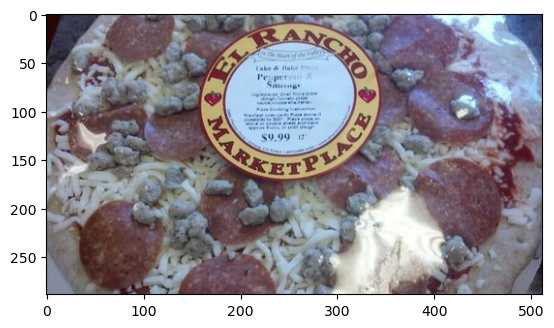

In [4]:
img = random_image('data/train','pizza')

(384, 512, 3)


array([[[ 86,  58,  19],
        [ 96,  66,  28],
        [ 97,  65,  26],
        ...,
        [ 67,  28,  11],
        [ 67,  30,  14],
        [ 65,  27,  14]],

       [[ 99,  71,  34],
        [102,  72,  34],
        [ 98,  66,  27],
        ...,
        [ 62,  23,   6],
        [ 61,  22,   7],
        [ 57,  20,   4]],

       [[ 93,  63,  27],
        [ 98,  68,  30],
        [101,  69,  31],
        ...,
        [ 61,  19,   3],
        [ 62,  20,   6],
        [ 60,  18,   4]],

       ...,

       [[ 14,   8,   8],
        [ 13,   7,   7],
        [ 11,   5,   5],
        ...,
        [ 93,  64,  30],
        [ 88,  62,  29],
        [ 79,  55,  21]],

       [[ 14,   8,   8],
        [ 12,   6,   6],
        [ 10,   4,   4],
        ...,
        [ 88,  60,  23],
        [ 85,  59,  24],
        [ 83,  59,  23]],

       [[ 16,   7,   8],
        [ 14,   5,   6],
        [ 12,   3,   4],
        ...,
        [ 76,  51,  11],
        [ 73,  49,  11],
        [ 89,  65,  29]]

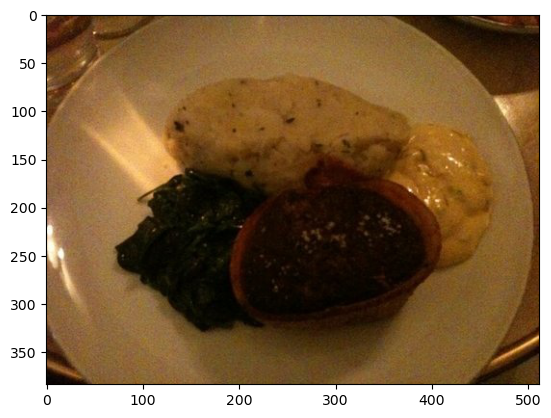

In [5]:
random_image('data/train','steak')

In [6]:
img.shape

(289, 512, 3)

# CNN Architecture

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# set the random seed
tf.random.set_seed(42)
# pre process the data
train_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to data dir
train_dir = 'data/train/'
test_dir = 'data/test/'
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)

validation_data  = validate_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)
# create the model - cnn explainer website
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# compile the model.
model1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# fit the model
history1 = model1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=validation_data,
                     validation_steps=len(validation_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 82s 2s/step - loss: 0.6666 - accuracy: 0.6420 - val_loss: 0.5453 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 83s 2s/step - loss: 0.4997 - accuracy: 0.7693 - val_loss: 0.3911 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 87s 2s/step - loss: 0.4290 - accuracy: 0.8120 - val_loss: 0.3657 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 91s 2s/step - loss: 0.4107 - accuracy: 0.8120 - val_loss: 0.3526 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 89s 2s/step - loss: 0.3940 - accuracy: 0.8333 - val_loss: 0.3417 - val_accuracy: 0.8500


<AxesSubplot:>

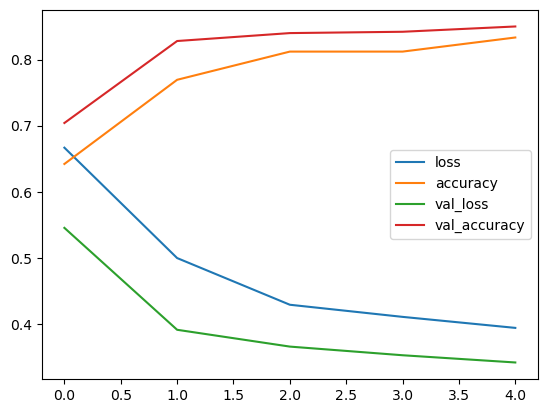

In [9]:
import pandas as pd

pd.DataFrame(history1.history).plot()

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Binary Regression on Image Data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# prepare the data
train_datagen = ImageDataGenerator(1./255)
test_datagen = ImageDataGenerator(1./255)

train_dir = 'data/train/'
test_dir = 'data/test/'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                         target_size=(224,224),
                                              batch_size=32,
                                               class_mode='binary',
                                              seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary',
                                            seed=42)
# set the seed
tf.random.set_seed(42)
# create the model.
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# compile the model.
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# fit the model.
history2 = model2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\DELL\.conda\envs\tensorflow\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
47/47 [==============================] - 16s 324ms/step - loss: 225.6369 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 327ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 15s 326ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 15s 329ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 15s 327ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000


<AxesSubplot:>

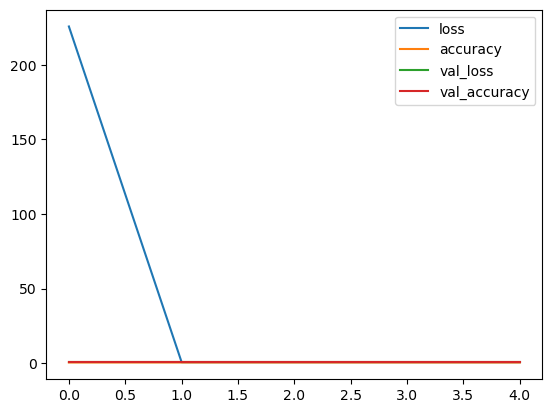

In [12]:
import pandas as pd

pd.DataFrame(history2.history).plot()

# Improve Regression Model

In [13]:
# set seed
tf.random.set_seed(42)
# create the model.
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['accuracy'])
# fit the model
history3 = model3.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 332ms/step - loss: 4941.2070 - accuracy: 0.6580 - val_loss: 889.9956 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 15s 322ms/step - loss: 639.8275 - accuracy: 0.7160 - val_loss: 435.1725 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 15s 323ms/step - loss: 528.9904 - accuracy: 0.6980 - val_loss: 196.3214 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 15s 323ms/step - loss: 69.8525 - accuracy: 0.6240 - val_loss: 1.3691 - val_accuracy: 0.5520
Epoch 5/5
47/47 [==============================] - 15s 324ms/step - loss: 0.7167 - accuracy: 0.5413 - val_loss: 0.6926 - val_accuracy: 0.5260


In [14]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 10)                1505290   
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,505,411
Trainable params: 1,505,411
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

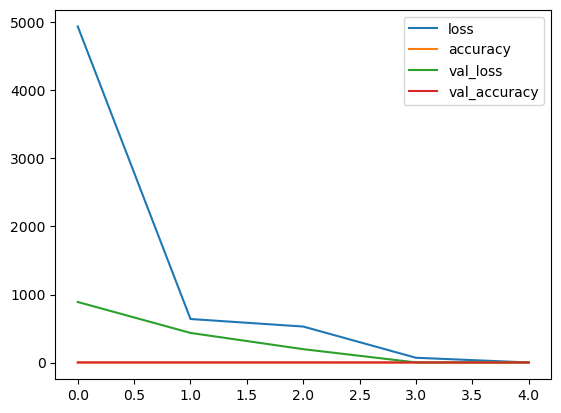

In [15]:
pd.DataFrame(history3.history).plot()

# Breaking the CNN Model

* Visualize the Data
* Prepare the Data
* Create the Model
* Fit the Model
* Evaluate the Model
* Improve the Model

## Vidualize the Data

random image file name in pizza is 179165.jpg
random image file shape in pizza is (512, 382, 3)
random image file name in steak is 2002400.jpg
random image file shape in steak is (384, 512, 3)


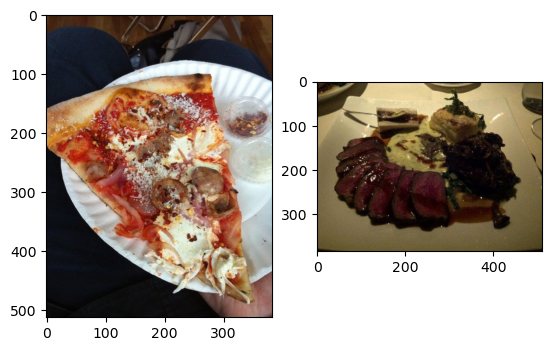

In [16]:
import os
import random
import matplotlib.pyplot as plt

def display_image(img):
    plt.imshow(img)

def view_random_image_os_dir(target_dir,types):
    fig,axes = plt.subplots(1,2)
    images = []
    for type_of in types:
        path = target_dir + '/' + type_of
        files = os.listdir(path)
        random_file = random.choice(files)
        print(f'random image file name in {type_of} is {random_file}')
        random_img = plt.imread(path + '/' + random_file)
        print(f'random image file shape in {type_of} is {random_img.shape}')
        images.append(random_img)
    i = 0
    for ax in axes:
        ax.imshow(images[i])
        i = i + 1

view_random_image_os_dir('data/train/',['pizza','steak'])

## Prepare the Data

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(1./255)
label_mode = 'binary'
train_data = train_data_gen.flow_from_directory(directory='data/train/',
                                  target_size=(224,224),
                                  class_mode=label_mode,
                                  batch_size=32,
                                  seed=42)
test_data_gen = ImageDataGenerator(1./255)
test_data = test_data_gen.flow_from_directory(directory='data/test/',
                                             target_size=(224,224),
                                             class_mode=label_mode,
                                             batch_size=32,
                                             seed=42)
print(f'size of train data is {len(train_data)}')
print(f'size of test data is {len(test_data)}')

#x,y = train_data.next()

# explore class_mode
#print(f'shape of label when class_mode {label_mode} is {y.shape}')
#print(y)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
size of train data is 47
size of test data is 16


## Create the model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# set the seed
tf.random.set_seed(42)
# set the constants
input_shape = (224,224,3)
# create the model.
model4 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides=1,padding='valid',input_shape=input_shape,activation='relu'),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])
# compile the model
model4.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=['accuracy'])
# fit the model.
history4 = model4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 103s 2s/step - loss: 815.4247 - accuracy: 0.4993 - val_loss: 15.4175 - val_accuracy: 0.5520
Epoch 2/5
47/47 [==============================] - 101s 2s/step - loss: 3.7017 - accuracy: 0.7547 - val_loss: 4.4826 - val_accuracy: 0.6460
Epoch 3/5
47/47 [==============================] - 102s 2s/step - loss: 0.3210 - accuracy: 0.9460 - val_loss: 4.3158 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 102s 2s/step - loss: 0.0256 - accuracy: 0.9893 - val_loss: 4.3621 - val_accuracy: 0.6400
Epoch 5/5
47/47 [==============================] - 101s 2s/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 4.0333 - val_accuracy: 0.6560


## Model Evaluation

In [19]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy_curves(history):
    fig,ax = plt.subplots(1,2,figsize=(10, 7))
    i = 0
    ax[i].plot(history.history['loss'])
    ax[i].plot(history.history['val_loss'])
    ax[i].set_title('training v/s validation loss')
    ax[i].set(xlabel='epochs', ylabel='loss')
    ax[i].legend(['train data','test data'])
    i = 1
    ax[i].plot(history.history['accuracy'])
    ax[i].plot(history.history['val_accuracy'])
    ax[i].set_title('training v/s validation accuracy')
    ax[i].set(xlabel='epochs', ylabel='accuracy')
    ax[i].legend(['train data','test data'])

## Improve the model

### Ways to induce overfitting

* Increase the number of conv layers
* Increase the number of conv filters
* Add another Dense layer to the output of the flattened layer

### Ways to reduce overfitting

* Add data augmentation
* Add regularization layers such MaxPool*
* Add more data

## Reduce Overfitting with data regularization (MaxPool)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# constants 
input_shape = (224,224,3)
# set seed
tf.random.set_seed(42)
# create the model
model5 = Sequential([
    Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=input_shape),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(units=1,activation='sigmoid')
])
# compile the model
model5.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=['accuracy'])
# fit the model
history5 = model5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 44s 907ms/step - loss: 1.5763 - accuracy: 0.5693 - val_loss: 0.7525 - val_accuracy: 0.5160
Epoch 2/5
47/47 [==============================] - 42s 893ms/step - loss: 0.6652 - accuracy: 0.6333 - val_loss: 0.6988 - val_accuracy: 0.5840
Epoch 3/5
47/47 [==============================] - 43s 923ms/step - loss: 0.5622 - accuracy: 0.7013 - val_loss: 0.7309 - val_accuracy: 0.5800
Epoch 4/5
47/47 [==============================] - 42s 894ms/step - loss: 0.4873 - accuracy: 0.7600 - val_loss: 0.7716 - val_accuracy: 0.6260
Epoch 5/5
47/47 [==============================] - 42s 898ms/step - loss: 0.3809 - accuracy: 0.8307 - val_loss: 0.8062 - val_accuracy: 0.6340


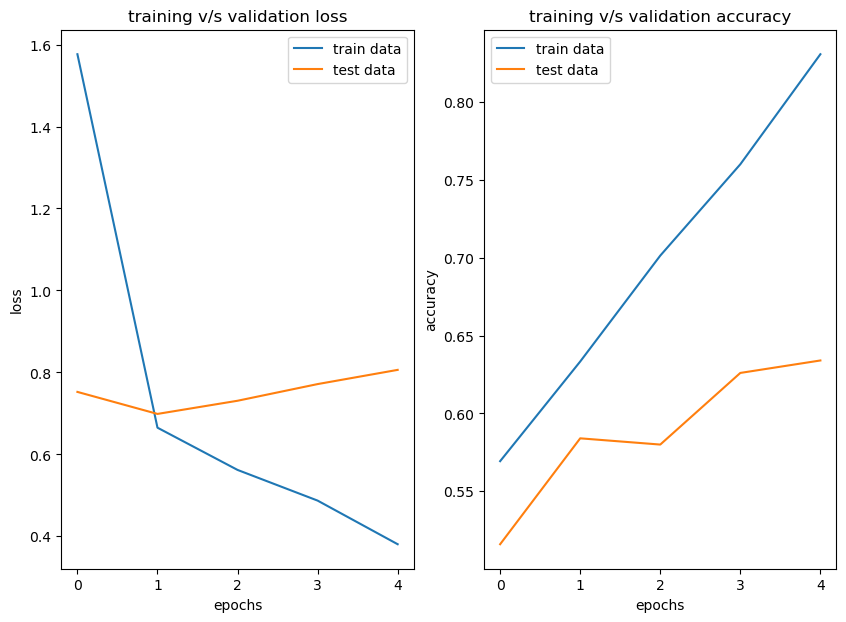

In [21]:
plot_loss_and_accuracy_curves(history5)

In [22]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

## Reducing Overfitting with data augmentation

### Visualize Data Augmentation

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import random

def display_original_and_augmented(orig,aug):
    random_idx = random.choice(np.arange(0,len(orig)))
    orig_image = orig[random_idx]
    aug_image = aug[random_idx]
    fig,axes = plt.subplots(1,2,figsize=(10,7))
    fig.suptitle(f'Image Random Index is {random_idx}')
    axes[0].imshow(orig_image)
    axes[0].set_title('Original Image')
    axes[1].imshow(aug_image)
    axes[1].set_title('Augmented Image')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = 'data/train/'
TEST_DIR  = 'data/test/'
IMG_SIZE  = (224,224)
DATA_AUGMENT   = 0.2
DATA_SCALE     = 1./255
train_datagen_augmented = ImageDataGenerator(rescale=DATA_SCALE,
                                            rotation_range=DATA_AUGMENT,
                                            shear_range=DATA_AUGMENT,
                                            zoom_range=DATA_AUGMENT,
                                            width_shift_range=DATA_AUGMENT,
                                            height_shift_range=DATA_AUGMENT,
                                            horizontal_flip=True
                                         )
train_datagen = ImageDataGenerator(rescale=1./255)

# original train data
train_data = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                                        shuffle=False,
                                                        target_size=IMG_SIZE,
                                                        class_mode='binary')
# augmented data 
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=TRAIN_DIR,
                                                        shuffle=False,
                                                        target_size=IMG_SIZE,
                                                        class_mode='binary')

# original images batch
images,labels = train_data.next()
# augmented images batch
images_augmented,labels_augmented = train_data_augmented.next()


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


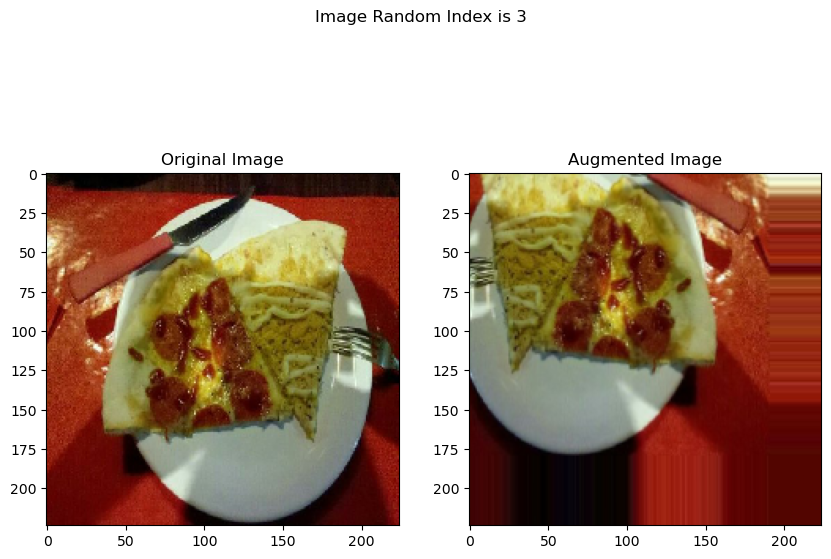

In [24]:
# display original and augmented images.
display_original_and_augmented(images,images_augmented)

### Create Model with Data Augmentation

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the random seed,
tf.random.set_seed(42)
# constants
INPUT_SHAPE = (224,224,3)
IMG_SIZE    = (224,224)
TRAIN_DIR   ='data/train/'
TEST_DIR    = 'data/test/'
DATA_SCALE     = 1./255
CLASS_MODE  = 'binary'
DATA_AUGMENT   = 0.2
SHUFFLE     = False
FILTER_SIZE = 10
KERNEL_SIZE = 3
ACTIVATION  = 'relu'
# data preprocessing
train_datagen_augmented = ImageDataGenerator(rescale=DATA_SCALE,
                                            rotation_range=DATA_AUGMENT,
                                            shear_range=DATA_AUGMENT,
                                            zoom_range=DATA_AUGMENT,
                                            width_shift_range=DATA_AUGMENT,
                                            height_shift_range=DATA_AUGMENT,
                                            horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=DATA_SCALE)
# prepare the data
train_data = train_datagen_augmented.flow_from_directory(directory=TRAIN_DIR,
                                                        target_size=IMG_SIZE,
                                                        class_mode= CLASS_MODE,
                                                        shuffle=SHUFFLE)
test_data  = test_datagen.flow_from_directory(directory=TEST_DIR,
                                             target_size=IMG_SIZE,
                                             class_mode=CLASS_MODE,
                                             shuffle=SHUFFLE)
# create the model
model6 = Sequential([
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL_SIZE,activation=ACTIVATION,input_shape=INPUT_SHAPE),
    MaxPool2D(),
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL_SIZE,activation=ACTIVATION),
    MaxPool2D(),
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL_SIZE,activation=ACTIVATION),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])
# compile the model.
model6.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=['accuracy'])
# print model summary
model6.summary()
# fit the model
history6 = model6.fit(train_data_augmented,
                     epochs=5,
                     steps_per_epoch=len(train_data_augmented),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                     

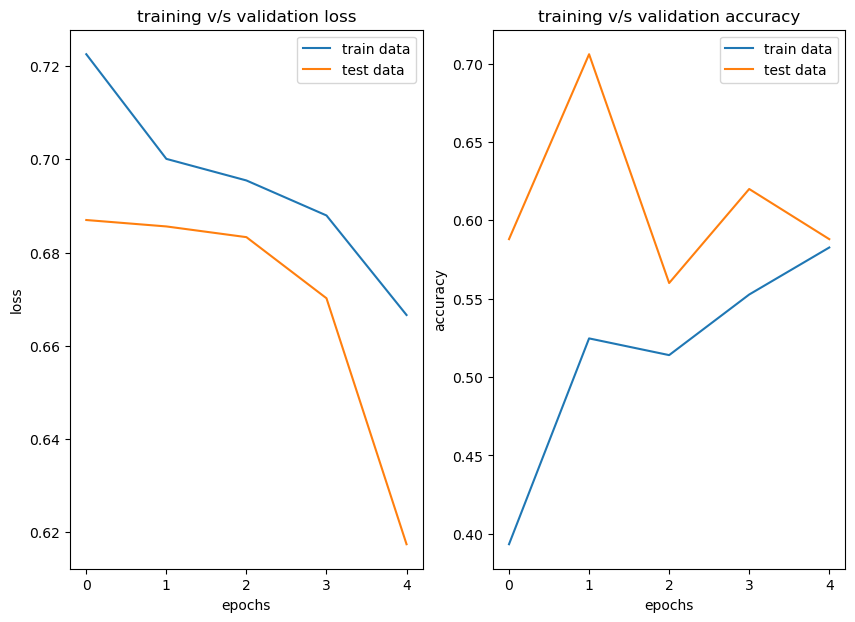

In [26]:
plot_loss_and_accuracy_curves(history6)

### Create Model with augmented data and shuffled

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# set random seed.
tf.random.set_seed(42)
# hyperparams contants
DATA_SCALE     = 1./255
DATA_AUGMENT   = 0.2
TRAIN_DIR      = 'data/train/'
TEST_DIR       = 'data/test/'
IMG_SIZE       = (224,224)
INPUT_SHAPE    = (224,224,3)
LABEL_MODE     = 'binary'
SHUFFLE        = True
FILTER_SIZE    = 10
KERNEL         = 3
RELU           = 'relu'
SIGMOID        = 'sigmoid'
# prepare data
train_datagen_augmented = ImageDataGenerator(rescale=DATA_SCALE,
                                            rotation_range=DATA_AUGMENT,
                                            shear_range=DATA_AUGMENT,
                                            zoom_range=DATA_AUGMENT,
                                            width_shift_range=DATA_AUGMENT,
                                            height_shift_range=DATA_AUGMENT,
                                            horizontal_flip=True)
test_datagen            = ImageDataGenerator(rescale=DATA_SCALE)

train_data = train_datagen_augmented.flow_from_directory(directory=TRAIN_DIR,
                                                        target_size=IMG_SIZE,
                                                        class_mode=LABEL_MODE,
                                                        shuffle=SHUFFLE)
test_data = test_datagen.flow_from_directory(directory=TEST_DIR,
                                            target_size=IMG_SIZE,
                                            class_mode=LABEL_MODE,
                                            shuffle=SHUFFLE)
# create the model.
model7 = Sequential([
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL,activation=RELU,input_shape=INPUT_SHAPE),
    MaxPool2D(),
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL,activation=RELU),
    MaxPool2D(),
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL,activation=RELU),
    MaxPool2D(),
    Flatten(),
    Dense(units=1,activation=SIGMOID)
])
# compile the model
model7.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=['accuracy'])
# print model summary
model7.summary()
# fit the model
history7 = model7.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                     

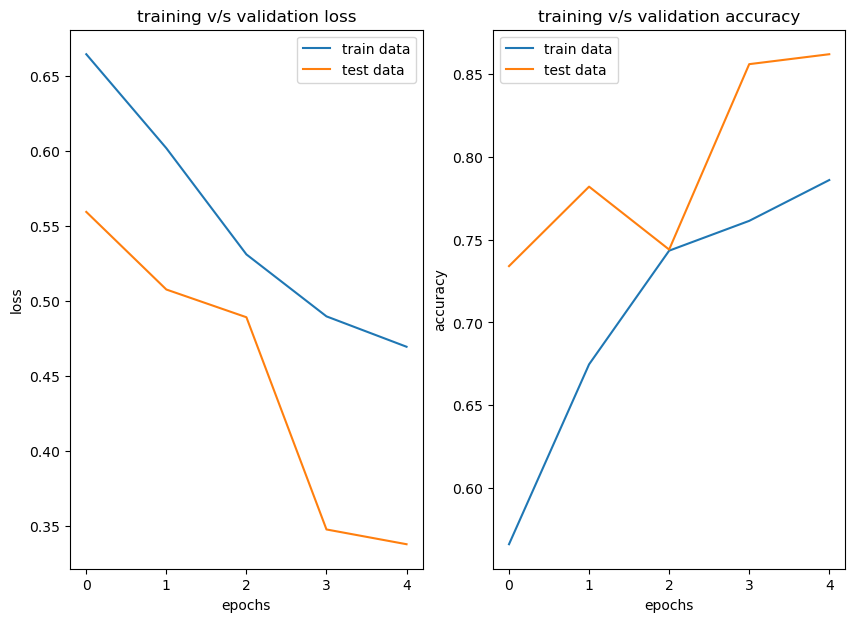

In [28]:
plot_loss_and_accuracy_curves(history7)

### Final attempt to improve performance

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# set random seed.
tf.random.set_seed(42)
# hyperparams contants
DATA_SCALE     = 1./255
DATA_AUGMENT   = 0.2
TRAIN_DIR      = 'data/train/'
TEST_DIR       = 'data/test/'
IMG_SIZE       = (224,224)
INPUT_SHAPE    = (224,224,3)
LABEL_MODE     = 'binary'
SHUFFLE        = True
FILTER_SIZE    = 10
KERNEL         = 3
RELU           = 'relu'
SIGMOID        = 'sigmoid'
NO_OF_EPOCHS   = 5
# prepare data
train_datagen_augmented = ImageDataGenerator(rescale=DATA_SCALE,
                                            rotation_range=DATA_AUGMENT,
                                            shear_range=DATA_AUGMENT,
                                            zoom_range=DATA_AUGMENT,
                                            width_shift_range=DATA_AUGMENT,
                                            height_shift_range=DATA_AUGMENT,
                                            horizontal_flip=True)
test_datagen            = ImageDataGenerator(rescale=DATA_SCALE)

train_data = train_datagen_augmented.flow_from_directory(directory=TRAIN_DIR,
                                                        target_size=IMG_SIZE,
                                                        class_mode=LABEL_MODE,
                                                        shuffle=SHUFFLE)
test_data = test_datagen.flow_from_directory(directory=TEST_DIR,
                                            target_size=IMG_SIZE,
                                            class_mode=LABEL_MODE,
                                            shuffle=SHUFFLE)
# create the model.
model8 = Sequential([
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL,activation=RELU,input_shape=INPUT_SHAPE),
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL,activation=RELU,input_shape=INPUT_SHAPE),
    MaxPool2D(),
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL,activation=RELU),
    Conv2D(filters=FILTER_SIZE,kernel_size=KERNEL,activation=RELU),
    MaxPool2D(),
    Flatten(),
    Dense(units=1,activation=SIGMOID)
])
# print model summary
model8.summary()
# compile the model
model8.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=['accuracy'])
# fit the model
history8 = model8.fit(train_data,
                     epochs=NO_OF_EPOCHS,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_27 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 

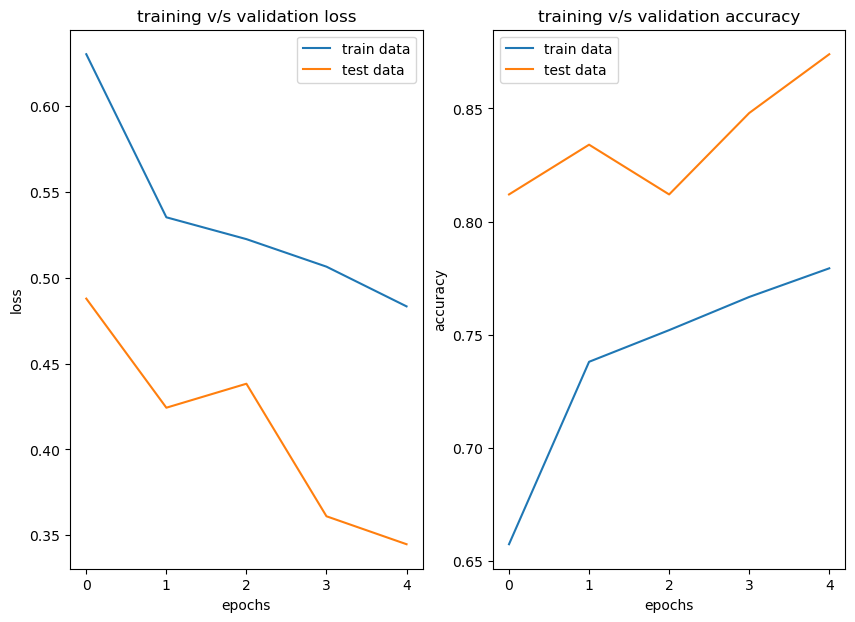

In [40]:
plot_loss_and_accuracy_curves(history8)

## Verify the trained with a custom image

In [41]:
import tensorflow as tf
def load_and_prep_image(filename,image_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=[image_shape,image_shape])
    img = img/255.
    return img

In [42]:
custom_img = load_and_prep_image('03-steak.jpeg')
print(f'custom_img shape is {custom_img.shape}')
custom_img = tf.expand_dims(custom_img,axis=0)
print(f'custom_img shape is {custom_img.shape}')

custom_img shape is (224, 224, 3)
custom_img shape is (1, 224, 224, 3)


In [46]:
model8_pred = model8.predict(custom_img)
model7_pred = model7.predict(custom_img)

print(f'model 7 prediction is {model7_pred}')
print(f'model 8 prediction is {model8_pred}')

1/1 [==============================] - 0s 160ms/step
model 7 prediction is [[0.8357749]]
model 8 prediction is [[0.7582629]]


## Probability to Label Mapping.

In [44]:
def pred_and_plot(model,filename):
    img_o = load_and_prep_image(filename)
    img = tf.expand_dims(img_o,axis=0)
    print(img.shape)
    pred = model.predict(img)
    print(pred)
    pred = tf.round(pred[0][0]).numpy()
    pred = int(pred)
    pred_label = class_names[pred]
    plt.imshow(img_o)
    plt.title(f'Prediction: {pred_label}')

(1, 224, 224, 3)
1/1 [==============================] - 0s 48ms/step
[[0.7582629]]


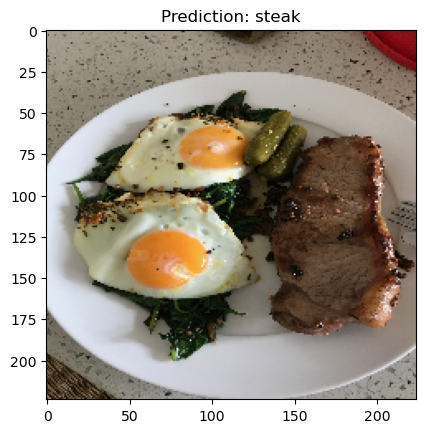

In [48]:
pred_and_plot(model8,'03-steak.jpeg')


(1, 224, 224, 3)
1/1 [==============================] - 0s 24ms/step
[[0.8357749]]


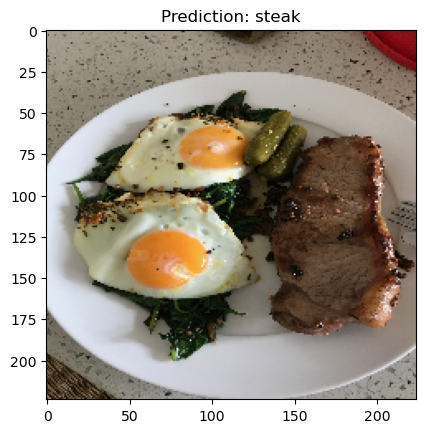

In [49]:

    pred_and_plot(model7,'03-steak.jpeg')

(1, 224, 224, 3)
1/1 [==============================] - 0s 24ms/step
[[0.40826994]]


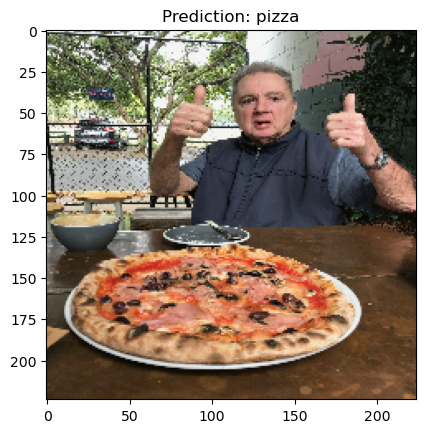

In [50]:
pred_and_plot(model7,'03-pizza-dad.jpeg')

(1, 224, 224, 3)
1/1 [==============================] - 0s 40ms/step
[[0.27405378]]


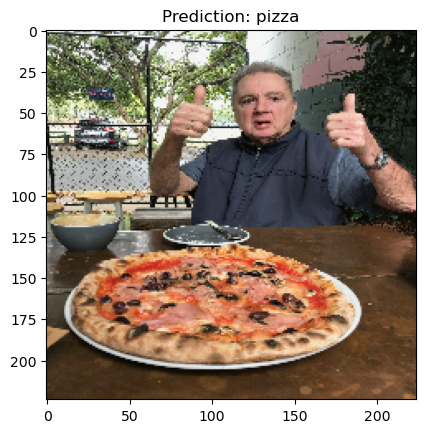

In [51]:
pred_and_plot(model8,'03-pizza-dad.jpeg')

(1, 224, 224, 3)
1/1 [==============================] - 0s 32ms/step
[[0.16971667]]


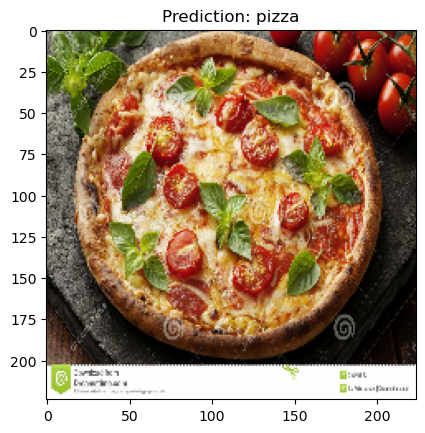

In [52]:
pred_and_plot(model7,'my-pizza-for-cnn.jpg')

(1, 224, 224, 3)
1/1 [==============================] - 0s 72ms/step
[[0.17786992]]


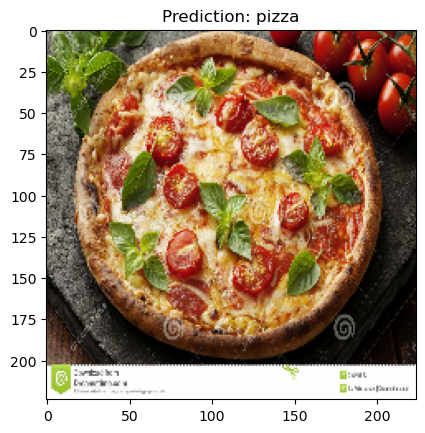

In [53]:
pred_and_plot(model8,'my-pizza-for-cnn.jpg')

In [55]:
history8.history

{'loss': [0.6300886869430542,
  0.535155177116394,
  0.5224376320838928,
  0.5064101815223694,
  0.4832969605922699],
 'accuracy': [0.6573333144187927,
  0.7379999756813049,
  0.7519999742507935,
  0.7666666507720947,
  0.7793333530426025],
 'val_loss': [0.4878120422363281,
  0.4242996275424957,
  0.43826067447662354,
  0.3610972464084625,
  0.34482723474502563],
 'val_accuracy': [0.8119999766349792,
  0.8339999914169312,
  0.8119999766349792,
  0.8479999899864197,
  0.8740000128746033]}